In [ ]:
import numpy as np
import pandas as pd
import json
import os

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
ansatz_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\AnsatzComparison"
#folder_path = r"C:\Users\johnkerf\Desktop\Quantum-Computing\Quantum-Computing\SUSY\SUSY QM\DE Optimization\VaryShots\AHO"
dataframes = {}
ansatz_folders = [f for f in os.listdir(ansatz_path) if os.path.isdir(os.path.join(ansatz_path, f))]
ansatz_folders

['Last3RY',
 'NoGates',
 'RealAmplitudesCNOT',
 'RY-ALL',
 'RY-CNOT-Custom',
 'StronglyEntanglingLayersCNOT',
 'StronglyEntanglingLayersCZ']

In [ ]:
potential = 'DW'
cutoff = 16

final_df = pd.DataFrame()

for ansatz in ansatz_folders:

    converged_runs = []
    mean_iters = []
    min_e = []
    delta_min_e = []
    median_e = []
    delta_median_e = []
    exact_e = []
    time_taken = []

    num_vqe = []
    shots = []
    tolerance = []
    abs_tolerance = []
    strategy = []
    popsize = []
    maxiter = []

    ansatz_list = []
    shots_list = []

    folder_path = os.path.join(ansatz_path, ansatz, potential)
    folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    for f in folders:

        ansatz_list.append(ansatz)
        shots_list.append(f)
        data_path = folder_path + "\\{}\\{}_{}.json".format(f,potential, cutoff)
        
        with open(data_path, 'r') as file:
            data = json.load(file)

        num_vqe.append(data['num_VQE'])
        shots.append(data['shots'])

        optimzer = data['Optimizer']
        maxiter.append(optimzer['maxiter'])
        tolerance.append(optimzer['tolerance'])
        abs_tolerance.append(optimzer['abs_tolerance'])
        strategy.append(optimzer['strategy'])
        popsize.append(optimzer['popsize'])

        #success = sum(data['success'])
        
        exact_min_e = np.min(data['exact_eigenvalues'])
        exact_e.append(exact_min_e)

        converged_runs.append(sum(data['success']))
        mean_iters.append(int(np.round(np.mean(data['num_iters']))))
        min_e.append(np.min(data['results']))
        delta_min_e.append(abs(exact_min_e - np.min(data['results'])))
        median_e.append(np.median(data['results']))
        delta_median_e.append(abs(exact_min_e - np.median(data['results'])))
        
        time_taken.append(data['parallel_run_time'])

    df = pd.DataFrame({
    'ansatz': ansatz_list,
    'shots': shots_list,
    'popsize': popsize,
    'num_vqe': num_vqe,
    #'shots': shots,
    'tolerance': tolerance,
    'abs_tolerance': abs_tolerance,
    'strategy': strategy,
    'Converged Runs': [f"{c}/40" for c in converged_runs],
    'maxiter': maxiter,
    'Mean Iter': mean_iters,
    'VQE min E': [f"{num:.5e}" for num in min_e],
    'Delta min E': [f"{num:.5e}" for num in delta_min_e],
    'VQE median E': [f"{num:.5e}" for num in median_e],
    'Delta median E': [f"{num:.5e}" for num in delta_median_e],
    'Exact': [f"{num:.5e}" for num in exact_e],
    'Time': time_taken
    })
        
    df1 = df[df['shots'] != 'None']
    df1.loc[:,'shots'] = df1['shots'].astype(int)
    df1 = df1.sort_values('shots')
    df2 = df[df['shots'] == 'None']
    final = pd.concat([df1,df2])

    final['Delta min E'] = final['Delta min E'].astype(float)
    final['Delta median E'] = final['Delta median E'].astype(float)

    final_df = pd.concat([final_df, final])


    # Plotting each ansatz on the same chart
    plt.figure(figsize=(20, 15))

    # Group by 'ansatz' and plot each group as a line
    for name, group in final[final['shots'] != 'None'].groupby('ansatz'):
        plt.plot(group['shots'], group['Delta median E'], marker='o', label=name)

    # Add labels and title
    plt.xlabel("Number of Shots")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("Delta to Min Value")
    plt.title("Delta to Min Value vs. Number of Shots for Each Ansatz")
    plt.legend(title="Ansatz")

    save_path = os.path.join(folder_path, "plot.png")
    plt.savefig(save_path)
        
    
    

In [68]:
final_df

,ansatz,shots,popsize,num_vqe,tolerance,abs_tolerance,strategy,Converged Runs,maxiter,Mean Iter,VQE min E,Delta min E,VQE median E,Delta median E,Exact,Time
2,Last3RY,2,20,40,0.001,0.001,randtobest1bin,40/40,10000,33,8.91599e-01,7.338570e-14,8.91599e-01,7.338570e-14,8.91599e-01,0:00:03.928789
6,Last3RY,8,20,40,0.001,0.001,randtobest1bin,40/40,10000,49,8.91599e-01,7.338570e-14,8.91599e-01,7.338570e-14,8.91599e-01,0:00:10.784172
4,Last3RY,32,20,40,0.001,0.001,randtobest1bin,40/40,10000,93,8.91599e-01,7.338570e-14,8.91599e-01,7.338570e-14,8.91599e-01,0:00:25.548875
1,Last3RY,128,20,40,0.001,0.001,randtobest1bin,40/40,10000,1206,8.91599e-01,7.316370e-14,8.91599e-01,7.316370e-14,8.91599e-01,0:03:45.391213
5,Last3RY,512,20,40,0.001,0.001,randtobest1bin,0/40,10000,10000,8.95198e-01,3.598680e-03,9.06985e-01,1.538590e-02,8.91599e-01,0:10:58.245475
0,Last3RY,1024,20,40,0.001,0.001,randtobest1bin,0/40,10000,10000,9.27109e-01,3.550990e-02,9.46861e-01,5.526190e-02,8.91599e-01,0:11:10.402148
3,Last3RY,2048,20,40,0.001,0.001,randtobest1bin,0/40,10000,10000,9.59274e-01,6.767480e-02,9.80392e-01,8.879270e-02,8.91599e-01,0:11:27.225539
7,Last3RY,None,20,40,0.001,0.001,randtobest1bin,40/40,10000,35,1.09052e+00,1.989250e-01,1.09185e+00,2.002530e-01,8.91599e-01,0:00:02.710516
2,NoGates,2,20,40,0.001,0.001,randtobest1bin,40/40,10000,6,8.91599e-01,7.338570e-14,8.91599e-01,7.338570e-14,8.91599e-01,0:00:01.407517
6,NoGates,8,20,40,0.001,0.001,randtobest1bin,40/40,10000,210,8.91599e-01,7.338570e-14,8.91599e-01,7.338570e-14,8.91599e-01,0:00:12.135975


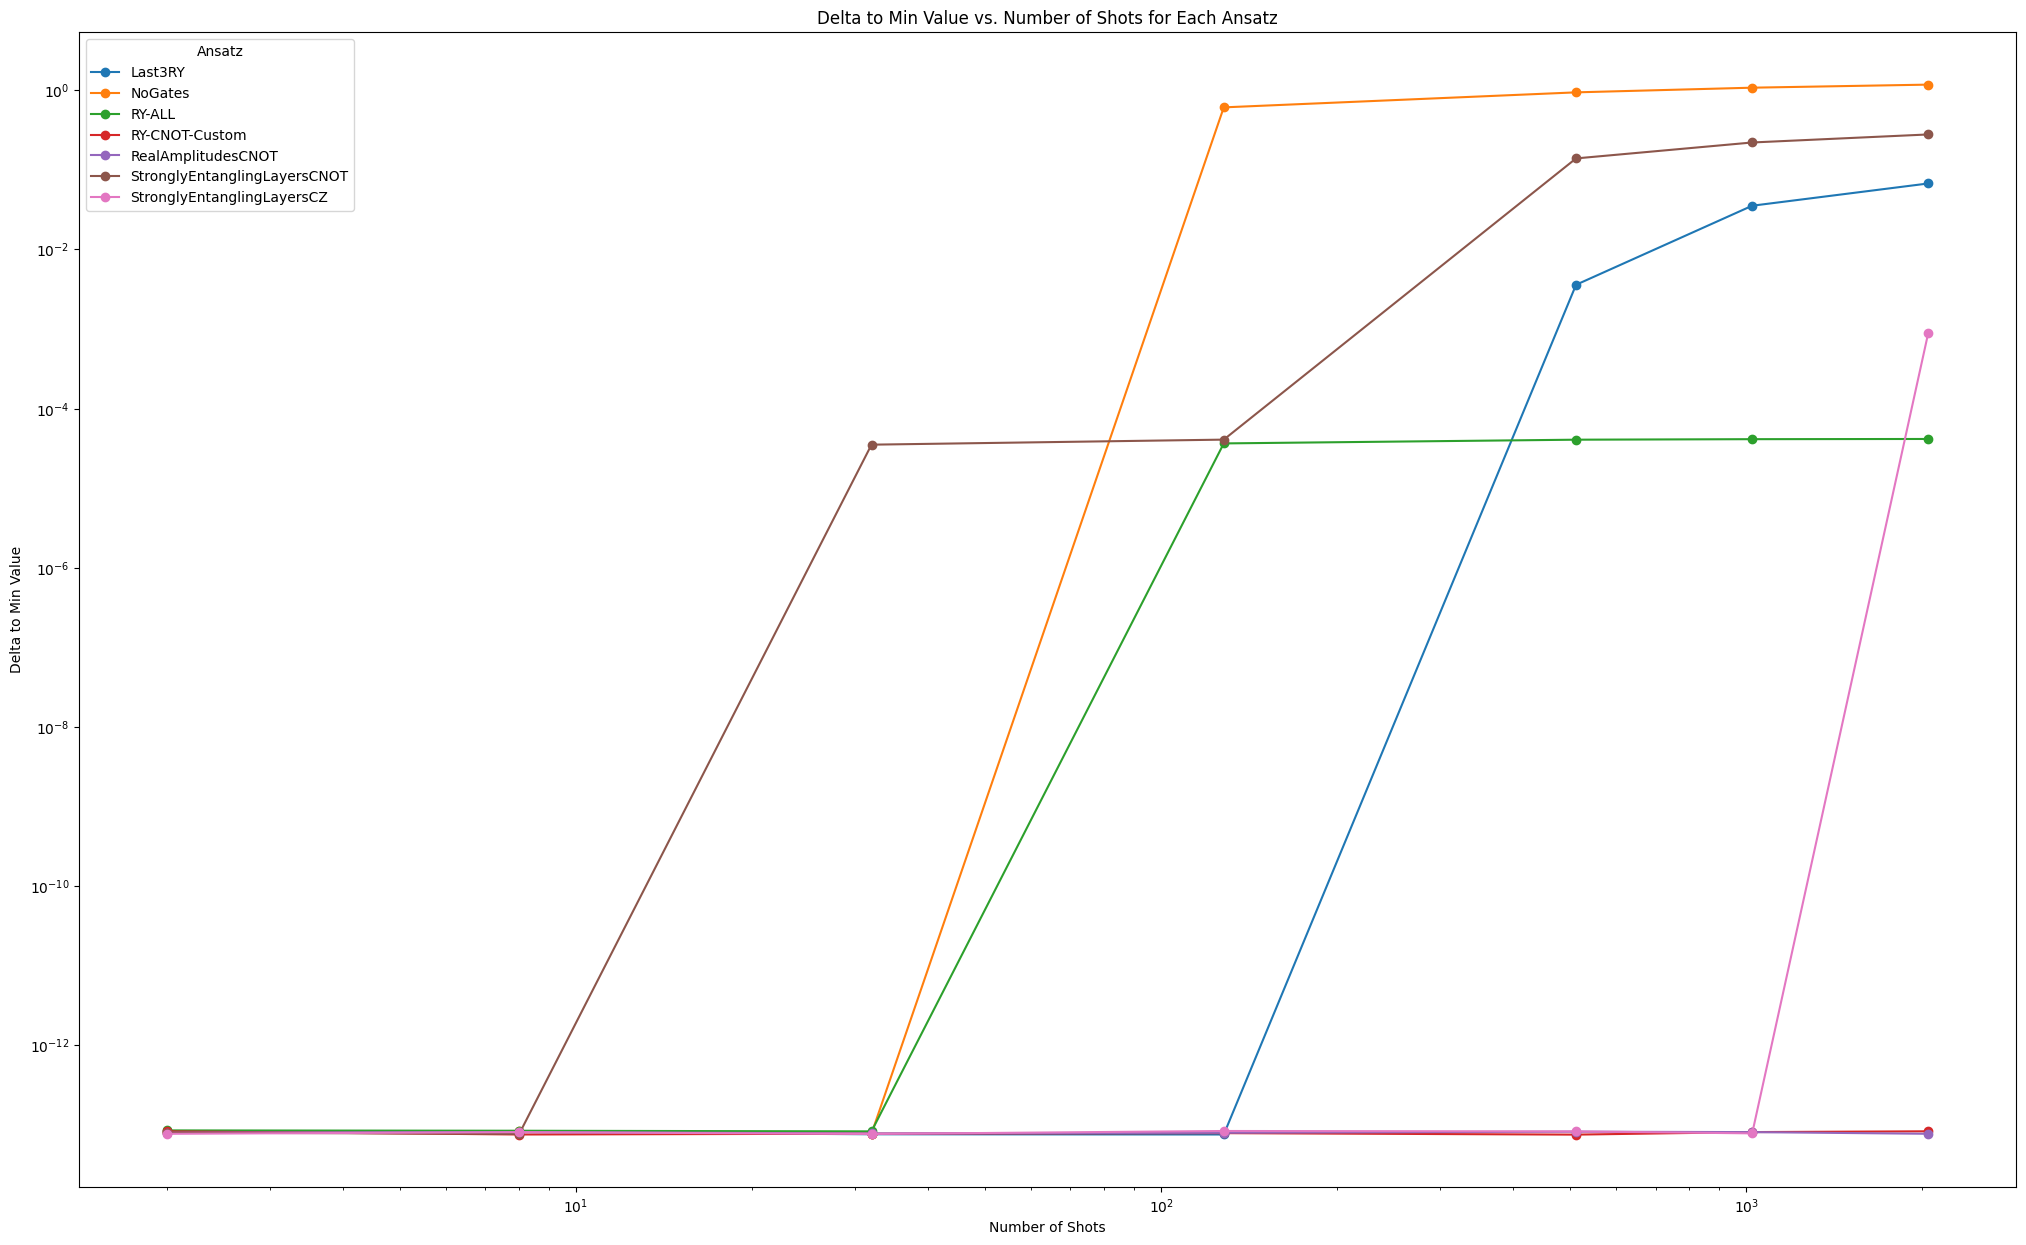

In [74]:
# Plotting each ansatz on the same chart
plt.figure(figsize=(25, 15))

# Group by 'ansatz' and plot each group as a line
for name, group in final_df[final_df['shots'] != 'None'].groupby('ansatz'):
    jitter = np.random.uniform(0, 1e-14, size=len(group))
    plt.plot(group['shots'], group['Delta min E']+jitter, marker='o', label=name)

# Add labels and title
plt.xlabel("Number of Shots")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Delta to Min Value")
plt.title("Delta to Min Value vs. Number of Shots for Each Ansatz")
plt.legend(title="Ansatz")

plt.savefig(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\AnsatzComparison\all_plot.png")